In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
from matplotlib.patches import Polygon
import seaborn as sns

In [3]:
from matplotlib import rcParams, rc
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
rc('text', usetex = False)

In [16]:
f = open("../../data/cis_element/CB_CCS.txt")

In [17]:
s = f.readlines()

In [18]:
df = []

In [19]:
s[0]

'ROOTMOTIFTAPOX1                 3 (-) ATATT                         S000098\n'

In [20]:
for l in s:
    data = l.split()
    df.append(data[:-1])

In [21]:
df = pd.DataFrame(df)

In [22]:
df.columns = ["name", "pos", "strand", "seq"]

In [23]:
MYB = ["MYBPZM", "MYBCORE", "ARR1AT"]

In [24]:
df

,name,pos,strand,seq
0,ROOTMOTIFTAPOX1,3,(-),ATATT
1,ROOTMOTIFTAPOX1,4,(+),ATATT
2,MYBPZM,13,(-),CCWACC
3,SORLIP2AT,17,(+),GGGCC
4,CAATBOX1,27,(+),CAAT
...,...,...,...,...
401,GATABOX,1979,(-),GATA
402,CAATBOX1,1982,(+),CAAT
403,ARR1AT,1983,(-),NGATT
404,GT1CONSENSUS,1991,(-),GRWAAW


In [25]:
pzm = df[df["name"] == MYB[0]]
core = df[df["name"] == MYB[1]]
arr = df[df["name"] == MYB[2]]

In [26]:
core

,name,pos,strand,seq
35,MYBCORE,221,(+),CNGTTR
192,MYBCORE,1014,(+),CNGTTR
305,MYBCORE,1555,(+),CNGTTR
358,MYBCORE,1808,(+),CNGTTR


In [27]:
def drawTriangle(x, y, colors):
    pts = np.array([(x, y), (x+25, y+0.1), (x-25, y+0.1)])
    p = Polygon(pts, closed=False, fc = colors)
    return p

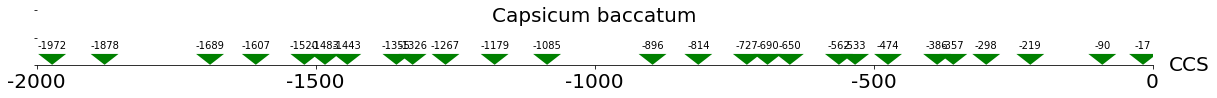

In [28]:
plt.figure(figsize=(20, 1))

plt.plot()
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
# plt.gca().spines['bottom'].set_visible(False)
plt.xlim(0, 2000)
plt.ylim(-0.5,0)
plt.gca().spines['left'].set_visible(False)
plt.xticks([0, 500, 1000, 1500, 2000], ["-2000", "-1500", "-1000", "-500", "0"], fontsize = 20)
plt.yticks(visible = False)
plt.text(2030, -0.5, "CCS", fontsize = 20, verticalalignment = "center")
ax = plt.gca()
"""
for idx in pzm.index:
    x = int(pzm.loc[idx, "pos"])
    plt.text(x, -0.35, x-2000, horizontalalignment='center')
    ax.add_patch(drawTriangle(x, -0.5, "red"))

for idx in core.index:
    x = int(core.loc[idx, "pos"])
    plt.text(x, -0.35, x- 2000, horizontalalignment='center')
    ax.add_patch(drawTriangle(x, -0.5, "blue"))
"""

for idx in arr.index:
    x = int(arr.loc[idx, "pos"])
    plt.text(x, -0.35, x- 2000, horizontalalignment='center')
    ax.add_patch(drawTriangle(x, -0.5, "green"))


    
    
plt.text(1000, -0.1, "Capsicum baccatum", fontsize = 20, horizontalalignment = "center")

# plt.savefig("CaChil.png", bbox_inches = "tight")
plt.show()